# DAY 6: Neural Networks for Regression

### Machine Learning and Computational Statistics (DSC6232)

#### Instructors: Weiwei Pan, Melanie Fernandez, Pavlos Protopapas

#### Due: July 30th, 2:00 pm Kigali Time

**First name**: LONGIN


**Last name**: DUSENGEYEZU

**ID**:220020609

## Learning Goals:

1. review polynomial regression (with and without regularization)
2. train a neural network
    * adjust the learning rate appropriately
    * read trace plots of the loss function
3. regularize a neural network
4. compare polynomial regression with neural network regression

In [ ]:
# import necessary libraries

# For neural networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD, Adam
from keras.regularizers import l2

# Non-neural network models and data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

# Numerical computation and visualization
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

#### Auxiliary functions to generate and visualize data. 
**No need to read through!**

In [ ]:
def make_toy_data():
  '''
  make_toy_data generates synthetic data for regression.
  
  input: none
  output: 
    x_train - a numpy array of length 200 * 0.6
    x_test - a numpy array of length 200 * 0.4
    y_train - a numpy array of length 200 * 0.6
    y_test - a numpy array of length 200 * 0.4
    
  '''
  # set the number of samples to take for each toy dataset
  n_samples = 200
  # set the proportion of toy data to hold out for testing
  test_size = 0.4
  # set observation noise level
  sigma = 2.0

  # define a function
  f = lambda x: 10.0 * np.sin(np.sqrt(x * 100.0)) ** 2.0 + (100.0 * x) ** (2.0 / 3.0)

  # choose some points from the function - this is our toy dataset 
  x = np.random.permutation(np.linspace(0, 0.5, n_samples)).reshape(-1, 1)

  # add some noise to the funciton values
  y = f(x) + np.random.normal(0, sigma, size=x.shape)

  # create training and testing data from this set of points
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

  # sort training set by x value
  data = zip(x_train, y_train)
  data = np.array(sorted(data, key=lambda d: d[0]))
  x_train = data[:, 0]
  y_train = data[:, 1]

  # sort test set by x value
  data = zip(x_test, y_test)
  data = np.array(sorted(data, key=lambda d: d[0]))
  x_test = data[:, 0]
  y_test = data[:, 1]
  
  return x_train, x_test, y_train, y_test

### Let us generate some data for regression

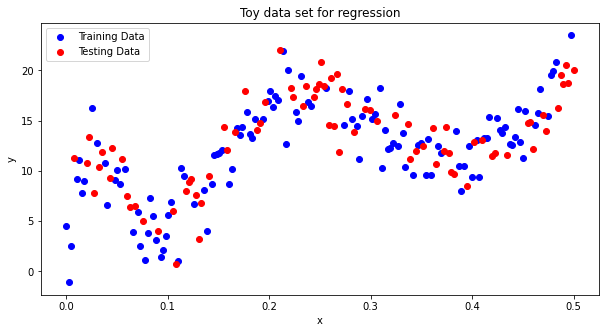

(80, 1)

In [ ]:
# Generate toy data
x_train, x_test, y_train, y_test = make_toy_data()

# Plot the toy data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(x_train, y_train, color='blue', label='Training Data') # scatter plot the training data
ax.scatter(x_test, y_test, color='red', label='Testing Data') # scatter plot the testing data

ax.legend(loc='best') # add legend
ax.set(xlabel='x', ylabel='y', title='Toy data set for regression') # set title and axis labels
plt.show()
y_test.shape

## 1. Review: Polynomial Regression

Let's train a polynomial regression model on this dataset.

**Exercise 1:** Train a polynomial of degree at least 50 on this data. Visualize your model, and evaluate your model's train and test MSE. How well does your model fit the data? Relate your answers to concept like overfitting/underfitting, bias/variance and generalization error.

**Answer:**

After observing MSE and visualizing different graph we have seen data state of model is changing due to the randomness of in our data set.
But whatever case   our model flow the trends of our data very well because on the graph, model try to flow the trends of the data. Even though MSE for testing and training are higher and closer due to the higher variability of the data. This Couse higher variance and Generalization error. But model tries to flow trends of the data. In order to deal with this problem, we can try to play around with the polynomial degree and find one where we minimize the difference between the train and test MSEs respecting that the values of the MSEs are also small.

In [ ]:
# Step 1: Define the polynomial features
degree = 50
features = PolynomialFeatures(degree)
x_train_poly = features.fit_transform(x_train)
x_test_poly = features.fit_transform(x_test)

# Step 2: Define the regression model
linear_regression = LinearRegression(fit_intercept=False)

# Step 3: Transform the training x's using the polynomial features, and then fit the regression model
linear_regression.fit(x_train_poly, y_train)

# Step 5: Predict on training data
y_train_pred = linear_regression.predict(x_train_poly)
# Stet 6: Compute train MSE
print('MSE on Training Data:', mean_squared_error(y_train, y_train_pred))

# Step 7: Predict on test data
y_test_pred = linear_regression.predict(x_test_poly)
# Stet 8: Compute test MSE
print('MSE on Testing Data: ', mean_squared_error(y_test, y_test_pred))


MSE on Training Data: 4.197053700899641
MSE on Testing Data:  5.797745232665789


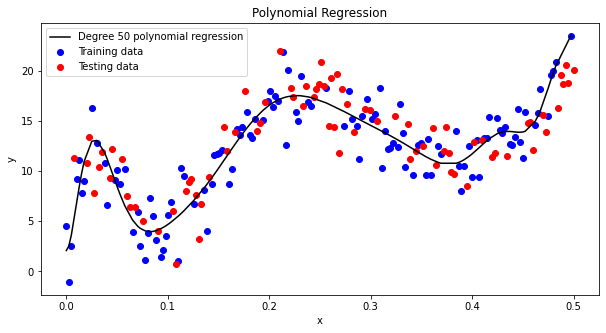

In [ ]:
# Steep 5: Plot the polynomial model against the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='blue', label='Training data')
ax.scatter(x_test, y_test, color='red', label='Testing data')
ax.plot(x_train, y_train_pred, color='black', label='Degree {} polynomial regression'.format(degree))
#ax.plot(x_test, y_test_pred, color='green', label='Degree {} polynomial regression for testing data'.format(degree))
ax.legend()
ax.set(xlabel='x', ylabel='y', title='Polynomial Regression')
plt.show()

**Exercise 2:** Try different degrees for your polynomial model, which degree is the most appropriate and why? Relate your answers to concept like overfitting/underfitting, bias/variance and generalization error.

**Answer:**

Buy trying different degree of polynomial, if we decrease degree of polynomial to lower value example 2,our model underfiting our data resulting higher biase  but slow variance this mean tha mse for training be very higer also for testing , as increase degree of polynomial model tends to flow trends of data.
**For degree 10** is where our model best fit our data but still because nose in data resulting higher variance mean overfitting or higher variance due to unreducible error. 
When you continue to increase degree of now become overfitting due to higher test error and higher variance.

As we decrease model complexity, we have also decreased the error due to overfitting but variation in the data can still be seen visually and the reason for high variance is caused by the noise level in the data which is high. Reducing the polynomial degree here reduces our variance and increases our bias but due to the high noise level in the data we can not conclude that the generalization error changed considerably. In my opinion, it is still high.





MSE on Training Data 14.804088753740821 for plynonial of 2 degree :
MSE on Training Data 15.842926759412077 for plynonial of 2 degree :
 
MSE on Training Data 4.467106566634698 for plynonial of 10 degree :
MSE on Training Data 5.146912294255162 for plynonial of 10 degree :
 
MSE on Training Data 4.197053645409292 for plynonial of 80 degree :
MSE on Training Data 5.79775592594648 for plynonial of 80 degree :
 
MSE on Training Data 4.197053812598898 for plynonial of 200 degree :
MSE on Training Data 5.797750475913039 for plynonial of 200 degree :
 


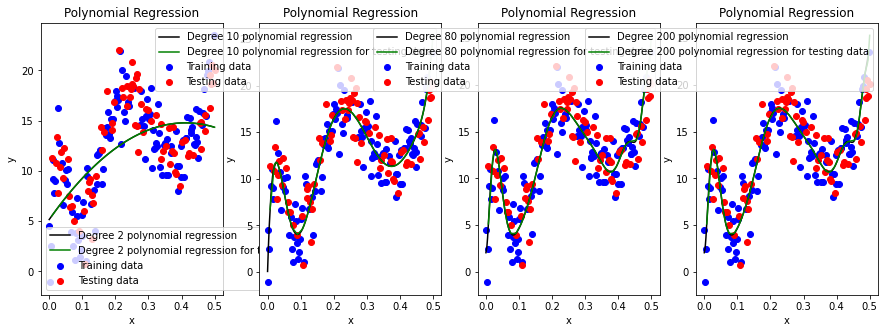

In [ ]:

# Make a list of polynomial degrees we want to try
poly_degree = np.array([2, 10, 80,200])
# Visualize the three models in a figure with one row and 3 columns, with size 15x5
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
for i in range(4):
  degree=poly_degree[i]
  features = PolynomialFeatures(degree)
  x_train_poly = features.fit_transform(x_train)
  x_test_poly = features.fit_transform(x_test)

  # Step 2: Define the regression model
  linear_regression = LinearRegression(fit_intercept=False)

  # Step 3: Transform the training x's using the polynomial features, and then fit the regression model
  linear_regression.fit(x_train_poly, y_train)

  # Step 5: Predict on training data
  y_train_pred = linear_regression.predict(x_train_poly)
  # Stet 6: Compute train MSE
  print('MSE on Training Data {} for plynonial of {} degree :'.format(mean_squared_error(y_train, y_train_pred),degree))

  # Step 7: Predict on test data
  y_test_pred = linear_regression.predict(x_test_poly)
  # Stet 8: Compute test MSE
  print('MSE on Training Data {} for plynonial of {} degree :'.format(mean_squared_error(y_test, y_test_pred),degree))
  print(" ")
  
    # Steep 5: Plot the polynomial model against the data
  ax[i].scatter(x_train, y_train, color='blue', label='Training data')
  ax[i].scatter(x_test, y_test, color='red', label='Testing data')
  ax[i].plot(x_train, y_train_pred, color='black', label='Degree {} polynomial regression'.format(degree))
  ax[i].plot(x_test, y_test_pred, color='green', label='Degree {} polynomial regression for testing data'.format(degree))
  ax[i].legend()
  ax[i].set(xlabel='x', ylabel='y', title='Polynomial Regression')
plt.show()




Now we will fit a regularized polynomial regression model to the data and investigage the effect of regularization on our model.


**Exercise 3:** Fit a degree 50 polynomial regression model with $\ell_2$-regularization on the training data (remember that $\ell_2$-regularized regression is called ***Ridge Regression*** and is implemented as `Ridge` by `sklearn`). Visualize your model and evaluate your model's train and test MSE.

Try different values for the regularization strength and choose one that is the most appropriate model. Justify your choice of the regularization strength by relating your answers to concept like overfitting/underfitting, bias/variance and generalization error.

**Answer:**
Visually, the model seems to fit the data well by following the general trend but you could argue that there is some variation in the data as some of the data points are dispersed everywhere but in a way that follows the trend.
 After using Ridge Regression and trying different regularization strength we observe that at 0.0000000000001 is where our model best fit our data since MSE on Training: 3.485759194406301 and MSE on testing : 3.2105871190587925 also model capture trends of our data. but also MSE error seems highr due to higher variablity in dataset.

In [ ]:
# Step 3: Instantiate a Ridge regression model
# Hint: you may want to look at this for reference
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# COMPLETE
degree = 50
features = PolynomialFeatures(degree)

# Step 2: Transform training and test input with PolynomialFeatures
x_train_poly = features.fit_transform(x_train)
x_test_poly = features.fit_transform(x_test)

# Step 3: Instantiate a Ridge regression model
# Hint: you may want to look at this for reference
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# COMPLETE

ridge_regression = Ridge(alpha=0.0000000000001, fit_intercept=False)

# Step 4: Fit the regression model
# COMPLETE
ridge_regression.fit(x_train_poly,y_train)
# Step 5: Compute the train MSE
# COMPLETE
y_train_pred=ridge_regression.predict(x_train_poly)
y_train_mse = mean_squared_error(y_train, y_train_pred)
print('MSE on Training Data:', y_train_mse)

# Step 6: Compute the test MSE
# COMPLETE
y_test_pred = ridge_regression.predict(x_test_poly)
y_test_mse = mean_squared_error(y_test, y_test_pred)
print('MSE on Training Data:', y_test_mse)


MSE on Training Data: 4.573968557768796
MSE on Training Data: 5.045664816232453


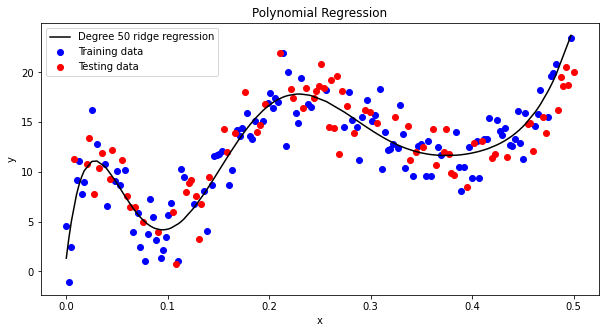

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# scatter plot the training data
ax.scatter(x_train, y_train, color='blue', label='Training data')
# scatter plot the test data
ax.scatter(x_test, y_test, color='red', label='Testing data')

# Step 7: Predict the labels on the training data using your model
# COMPLETE
#y_train_pred = ...
ax.plot(x_train, y_train_pred, color='black', label='Degree {} ridge regression'.format(degree))

ax.legend(loc='best')
ax.set(xlabel='x', ylabel='y', title='Polynomial Regression')
plt.show()

**Exercise 4:** Compare your regularized polynomial model to the unregularized polynomial model with the best degree in Exercise 2. In general to prevent both underfitting and overfitting, is it better to spend time choosing an appropriate polynomial degree for regression or is it better to use a high degree polynomial and choose a regularization strenght? Support your answers with concepts you've learned in class.


**Answer**: For polynomial degree 10, MSE on Training 3.3861875522595475 degree and MSE on testing 3.3584577215189904 for polynomial ,for L2 with leaning rate of 0.0000000000001, MSE on Training 3.485759194406301 and MSE on testing Dataset: 3.2105871190587925 as we can see for L2 our model has good performance. No need of to spend too much time on polynomial degree it better high degree polynomial and choose a regularization strength since L2 help reducing variance by penalizing weight to small value that can fit well our model.
This technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting. Hence, the regularized model above is said to be less overfitting than the unregularized model in addition spending time choosing a best fit polynomial degree can be time consuming.

---

# 2. Neural Network Regression

Now, we will fit a neural network regression model to the same data and compare it with our polynomial model.

**Exercise 5**: Train a neural network model with your choice of architecture on the training data. Visualize the traceplot to make sure that gradient descent has converged (try changing the learning rate to change convergence behavior)!

Visualize your model and compute the train/test MSE. Find the best architecture for this data (you must try different number of layers and different number of hidden nodes in each layer!). Justify your choice of the regularization strength by relating your answers to concept like overfitting/underfitting, bias/variance and generalization error.

**Answer:**

By changing architecture of neuron network by reducing number of hidden node you can just underfit your model also by increasing number of hidden node and hidden layer you can just overfitting model you have to look for balance.
In this experimental regularization strength I have observe that by too small leering later and fewer iteration my traceplot fail to converge our model underfiting our dataset here you need to increase leering rate and number of steps. If we choose higher learning rate even if we choose best iteration our model will never converge continue oscillating over converging number here our model overfitting our dataset, only solution here is to reduce Leering rate. 
For this case    the learning try to reduce MSE for both test and training is 0.1
But to comverge well.  
Visualize your model and compute the train/test MSE. Find the best architecture for this data (you must try different number of layers and different number of hidden nodes in each layer!). Justify your choice of the regularization strength by relating your answers to concept like overfitting/underfitting, bias/variance and generalization error.   

***Even though we have tried our best to minimize the MSEs, the MSEs we got are still high causing high variance, low bias and poor generalization error.***



In [ ]:
# Step 1: Create a base neural network to which we will add layers
neural_network = Sequential()

# Step 2: Add layers to the neural network
hidden_nodes = 5  # the number of hidden nodes in each layer
neural_network.add(Dense(hidden_nodes, input_dim=x_train.shape[-1], activation='tanh')) # Input layer
neural_network.add(Dense(hidden_nodes, activation='tanh'))                              # Hidden layer
neural_network.add(Dense(y_train.shape[-1], activation='linear'))                           # Output layer

# Step 3: Create an optimizer, which will be used to train our neural network
learning_rate = 0.1 # controls the step-size the optimizer takes at each iteration of the training
optimizer = SGD(lr=learning_rate)
neural_network.compile(loss='mse', optimizer=optimizer)

# Step 4: Trainn the neural network
batch_size = 100     # number of randomly-selected training points for which the optimizer will step
epochs = 1000  # number of training iterations
history = neural_network.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=epochs, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(120, 1)

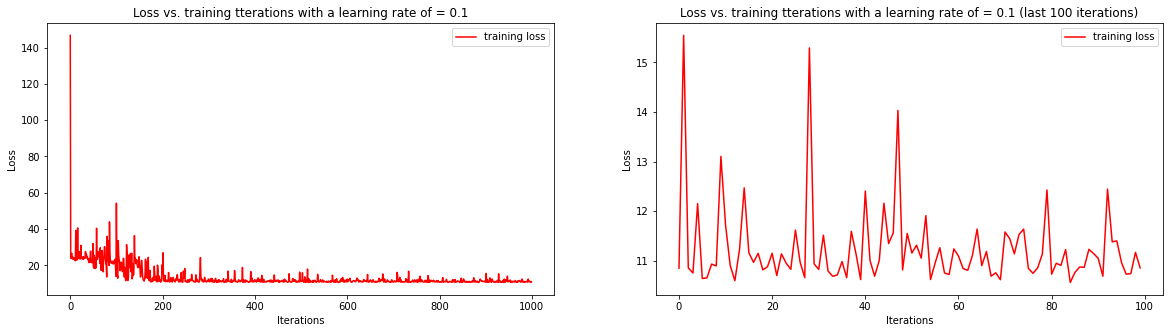

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Step 5: Visualize the training trajectory
ax[0].plot(np.array(history.history['loss']), color='red', label='training loss')

ax[0].legend()
ax[0].set_title('Loss vs. training tterations with a learning rate of = {}'.format(learning_rate))
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

# Ste 6: Visualize the training trajectory for the last 100 iterations
ax[1].plot(np.array(history.history['loss'])[-100:], color='red', label='training loss')

ax[1].legend()
ax[1].set_title('Loss vs. training tterations with a learning rate of = {} (last 100 iterations)'.format(learning_rate))
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
# Step 7: Predict label on training set
y_train_pred = neural_network.predict(x_train)

# Step 8: Compute MSE on training set 
print('MSE on Training Data:', mean_squared_error(y_train, y_train_pred))

# Step 9: Predict label on test set
y_test_pred = neural_network.predict(x_test)

# Step 10: Compute MSE on test set 
print('MSE on Testing Data: ', mean_squared_error(y_test, y_test_pred))

MSE on Training Data: 10.884212597106174
MSE on Testing Data:  12.018837190625906


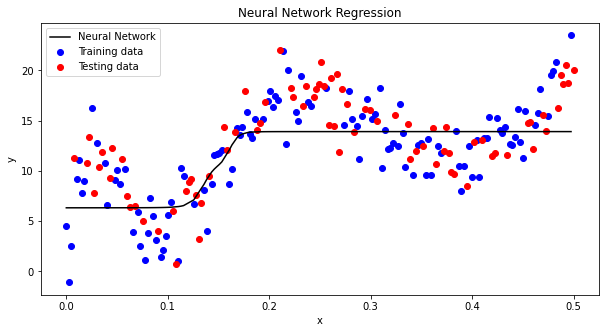

In [ ]:
# Step 11: Plot the neural network against the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.scatter(x_train, y_train, color='blue', label='Training data') # scatter plot the training data
ax.scatter(x_test, y_test, color='red', label='Testing data') # scatter plot test data

ax.plot(x_train, y_train_pred, color='black', label='Neural Network') # plot the train predictions

ax.legend()
ax.set(xlabel='x', ylabel='y', title='Neural Network Regression')
plt.show()

Now, we will investigate the effect of regularization on our neural network model.

**Exercise 6:** Train a neural network model with $\ell_2$-regularization on the training data. Visualize your model and evaluate your model's train and test MSE.

Try different values for the regularization penalty (by changing the value in the regularizer `l2(0.01)`). Choose an appropriate regularization strength for your model.

**Answer:**
The appropriate model constitutes 5 hidden nodes, the regularization penalty (by changing the value in the regularizer at l2(0.00000001)) and the learning rate of 0.01 leaving other attributes constant.

In [ ]:
# Step 1: Create a base neural network and regularizes
neural_network = Sequential()
reg = l2(0.00000001)  # change the strength of the regularizer

# Step 2: Add layers to the neural network
num_hidden_nodes = 10  # the number of hidden nodes in each layer
neural_network.add(Dense(num_hidden_nodes, input_dim=x_train.shape[-1], activation='tanh', kernel_regularizer=reg, bias_regularizer=reg))
neural_network.add(Dense(num_hidden_nodes, activation='tanh', kernel_regularizer=reg, bias_regularizer=reg))
neural_network.add(Dense(y_train.shape[-1], activation='linear', kernel_regularizer=reg, bias_regularizer=reg)) 

# Step 3: Create an optimizer, which will be used to train our neural network
learning_rate = 0.01  # controls the step-size the optimizer takes at each iteration of the training
optimizer = SGD(lr=learning_rate)
neural_network.compile(loss='mse', optimizer=optimizer)

# Step 4: Train the neural network
batch_sz = 100     # number of randomly-selected training points for which the optimizer will step
num_epochs = 1000  # number of training iterations
history = neural_network.fit(x_train, y_train, batch_size=batch_sz, shuffle=True, epochs=num_epochs, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


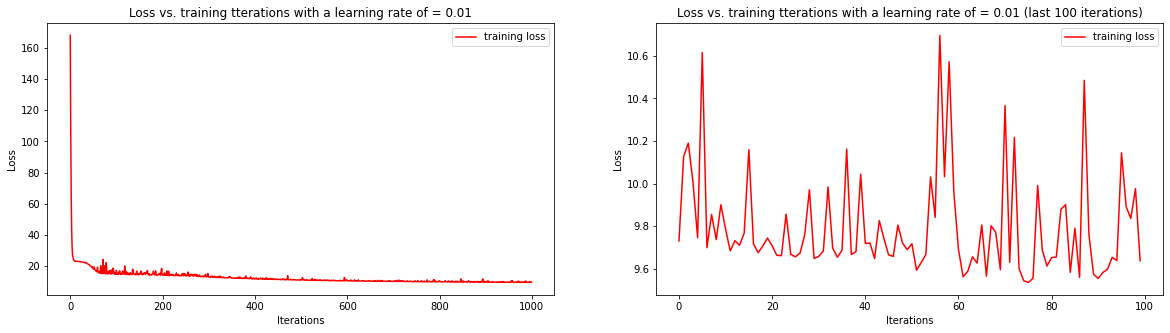

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Step 5: Visualize the training trajectory
ax[0].plot(np.array(history.history['loss']), color='red', label='training loss')

ax[0].legend()
ax[0].set_title('Loss vs. training tterations with a learning rate of = {}'.format(learning_rate))
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Loss')

# Ste 6: Visualize the training trajectory for the last 100 iterations
ax[1].plot(np.array(history.history['loss'])[-100:], color='red', label='training loss')

ax[1].legend()
ax[1].set_title('Loss vs. training tterations with a learning rate of = {} (last 100 iterations)'.format(learning_rate))
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Loss')
plt.show()

In [ ]:
# Step 5: Evaluate the model
y_train_pred = neural_network.predict(x_train)
print('MSE on Training Data:', mean_squared_error(y_train, y_train_pred))

y_test_pred = neural_network.predict(x_test)
print('MSE on Testing Data: ', mean_squared_error(y_test, y_test_pred))

MSE on Training Data: 9.812473985762193
MSE on Testing Data:  9.308262730139754


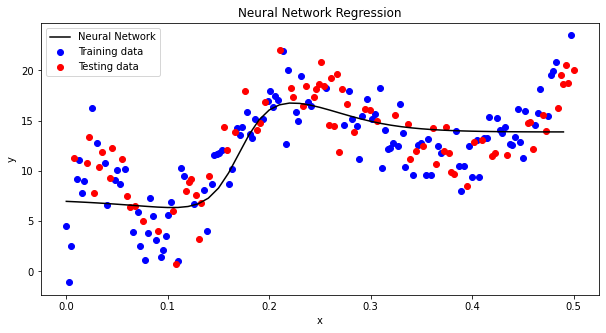

In [ ]:
# Step 7: Make predictions on a range of x-values for visualization
x_range = np.arange(0, 0.5, 0.01).reshape(-1, 1)
y_range_pred = neural_network.predict(x_range)

# Step 8: Plot the polynomial model against the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x_train, y_train, color='blue', label='Training data')
ax.scatter(x_test, y_test, color='red', label='Testing data')
ax.plot(x_range, y_range_pred, color='black', label='Neural Network')
ax.legend()
ax.set(xlabel='x', ylabel='y', title='Neural Network Regression')
plt.show()


**Exercise 7:** Compare your regularized neural network with the regularized polynomial regression model to the one in Exercise 3. Does your model fit the data better? Why or why not?

**Answer**:
in General A neural network model is the most optimal model we can apply for a given data due to its enormous characteristics. Neural networks offer a number of advantages, including requiring less formal statistical training, the ability to implicitly detect complex nonlinear relationships between dependent and independent variables, the ability to detect all possible interactions between predictor variables, and the availability of multiple training algorithms. In addition to the above advantages, we prefer neural networks due to their ability to learn faster with less space by making fast computation (prediction) with complex non-linear models.

for our experment Regularized polynomial regression model perform well rather that your regularized neural network
Since for neural network dependent on many factors like learning_rate for SGD , number of randomly-selected training points for which the optimizer will step
And number of training iterations. Also for neuron network need other regulation technics rather than penalizing weight on hidden layer using kernel_regularizer you can also penalizing output of hidden node using Activity_regularizer also you can apply  
 Drop-out probability technic to prevent network of being to complex since MSE error for both testing and training are higher 

